In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 18:42:01,905] A new study created in memory with name: no-name-430bffff-7310-4274-8680-29549de0c9a2


[I 2025-04-27 18:42:27,785] Trial 0 finished with value: 0.9573417721518988 and parameters: {'n_estimators': 6443, 'max_depth': 8, 'learning_rate': 0.007001652541349559, 'subsample': 0.9492082963633139, 'colsample_bytree': 0.5172883350128126, 'gamma': 3.029663480191744, 'reg_alpha': 0.002369240776351159, 'reg_lambda': 2.4318143568790726e-08}. Best is trial 0 with value: 0.9573417721518988.
[I 2025-04-27 18:42:58,282] Trial 1 finished with value: 0.9648734177215189 and parameters: {'n_estimators': 8475, 'max_depth': 10, 'learning_rate': 0.03195360548313747, 'subsample': 0.5916087509695988, 'colsample_bytree': 0.8505065982248414, 'gamma': 1.527374824439831, 'reg_alpha': 4.4188845582327475e-08, 'reg_lambda': 6.7431948511345725e-06}. Best is trial 1 with value: 0.9648734177215189.
[I 2025-04-27 18:42:59,852] Trial 2 finished with value: 0.9473417721518986 and parameters: {'n_estimators': 145, 'max_depth': 14, 'learning_rate': 0.003994559794994712, 'subsample': 0.9073658103952168, 'colsampl

Best trial:
Accuracy: 0.977373417721519
Best hyperparameters:  {'n_estimators': 2149, 'max_depth': 7, 'learning_rate': 0.04264908311762066, 'subsample': 0.5229086069378552, 'colsample_bytree': 0.8781930730854084, 'gamma': 3.1382394416953723, 'reg_alpha': 7.94239031835167e-05, 'reg_lambda': 1.0046097980501372e-08}


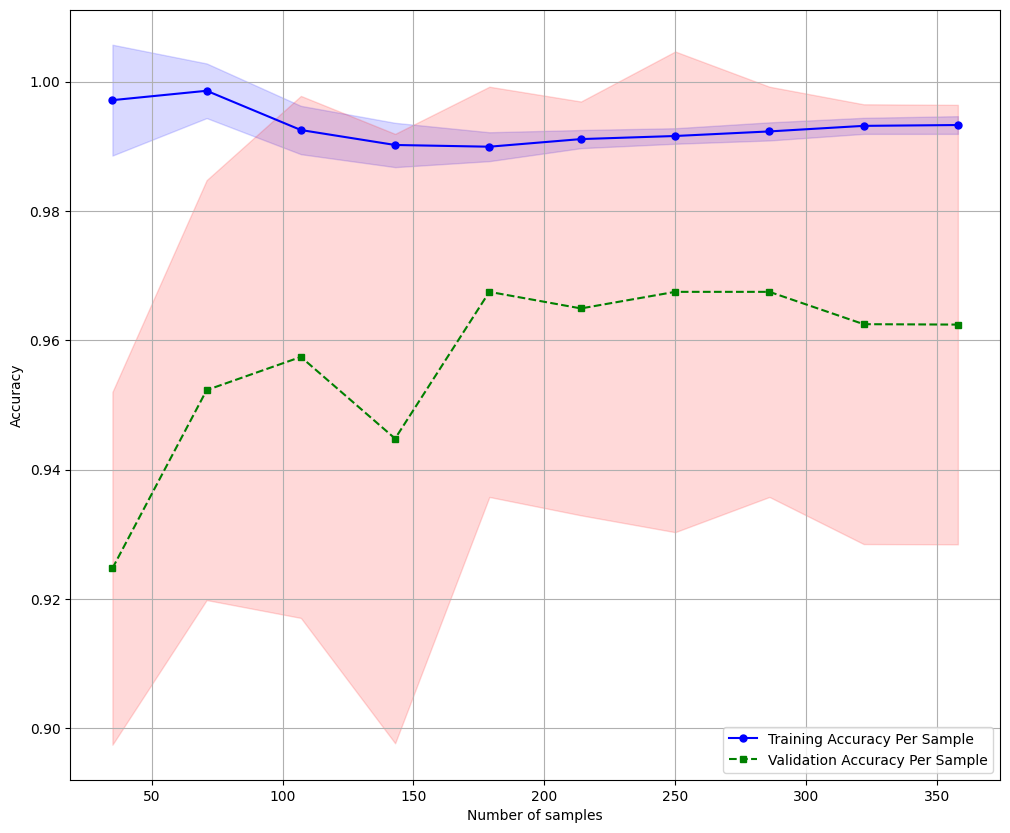

Confusion Matrix
[[ 57   7]
 [  0 107]]
Accuracy: 0.9591, Precision: 0.9386, Recall: 1.0000, F1: 0.9683, AUC: 0.9966


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

helper.train_and_evaluate_model('xgb', X_train_scaled, X_test_scaled, y_train, y_test)

---
# Raw Data
---

[I 2025-04-27 19:11:10,467] A new study created in memory with name: no-name-a0a5b942-533b-4117-a387-f2c22461a8c0
[I 2025-04-27 19:11:35,303] Trial 0 finished with value: 0.9673101265822786 and parameters: {'n_estimators': 5932, 'max_depth': 11, 'learning_rate': 0.013876701449096682, 'subsample': 0.6538338615496951, 'colsample_bytree': 0.9405092360123473, 'gamma': 1.0369530202468635, 'reg_alpha': 0.00031968972280246096, 'reg_lambda': 7.131747540202676e-08}. Best is trial 0 with value: 0.9673101265822786.
[I 2025-04-27 19:11:52,361] Trial 1 finished with value: 0.9547784810126583 and parameters: {'n_estimators': 4627, 'max_depth': 11, 'learning_rate': 0.15785334584862046, 'subsample': 0.5515601904615659, 'colsample_bytree': 0.7893362282798629, 'gamma': 4.0309071205054705, 'reg_alpha': 0.2625034294979876, 'reg_lambda': 3.564454186433194e-08}. Best is trial 0 with value: 0.9673101265822786.
[I 2025-04-27 19:12:32,172] Trial 2 finished with value: 0.9497151898734175 and parameters: {'n_est

Best trial:
Accuracy: 0.9774050632911392
Best hyperparameters:  {'n_estimators': 5296, 'max_depth': 8, 'learning_rate': 0.20414793238672307, 'subsample': 0.6897088091810701, 'colsample_bytree': 0.5837961502648387, 'gamma': 1.5180941202286795, 'reg_alpha': 1.990957499109887e-07, 'reg_lambda': 9.06031358517075e-08}


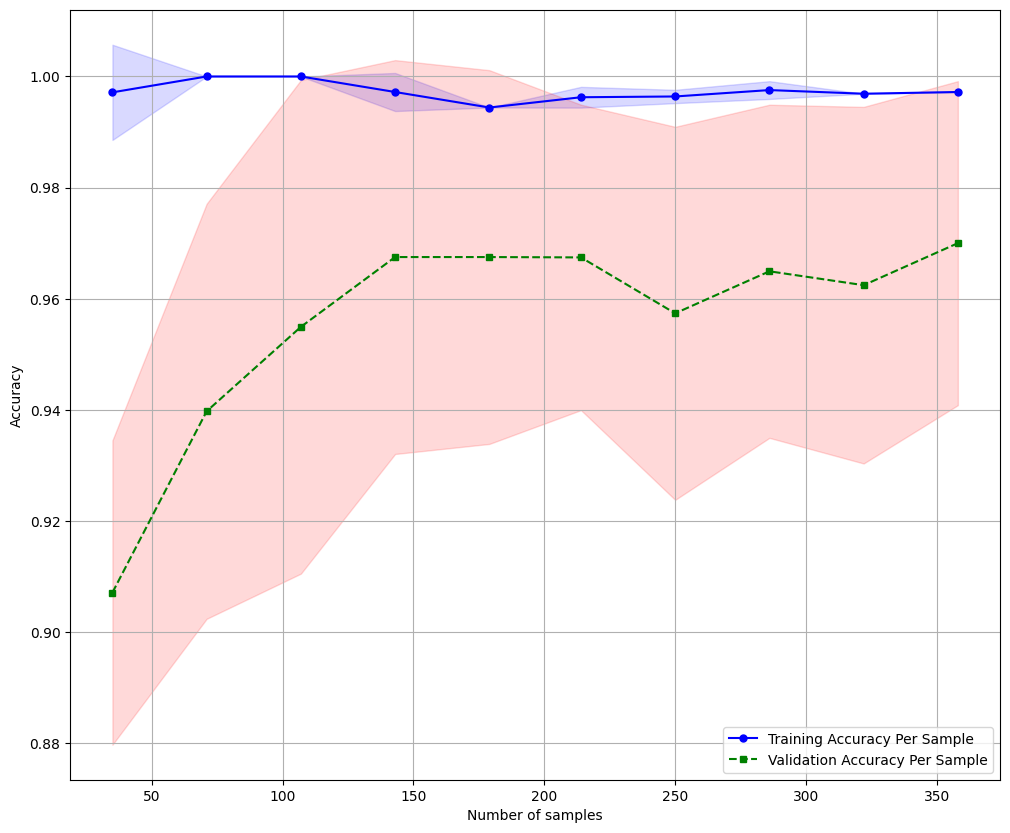

Confusion Matrix
[[ 58   6]
 [  1 106]]
Accuracy: 0.9591, Precision: 0.9464, Recall: 0.9907, F1: 0.9680, AUC: 0.9943


In [3]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
helper.train_and_evaluate_model('xgb', X_train, X_test, y_train, y_test)